In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# FEMALE - KAREN

In [2]:
female_paths = [
    "female/loss_dur_female.csv",
    "female/loss_fm_female.csv",
    "female/loss_kl_female.csv",
    "female/loss_mel_female.csv",
    "female/total_loss_female.csv"
]
dataframes = []
for file in female_paths:
    df = pd.read_csv(file, usecols=[1])
    dataframes.append(df)

# Concatenate all DataFrames into one
female = pd.concat(dataframes, ignore_index=True, axis=1)
female = female.rename(columns={0: 'dur', 1: 'fm', 2: 'kl', 3: 'mel', 4: 'total'})
female

,dur,fm,kl,mel,total
0,3.824757,12.341255,4.263629,31.144733,58.946060
1,2.331713,9.938871,2.402573,21.069511,42.893875
2,2.114757,9.482453,2.479047,20.248972,42.400459
3,2.231908,9.751267,2.849434,20.064899,43.180779
4,2.108727,8.541465,2.677431,20.206537,40.609951
...,...,...,...,...,...
1249,1.957011,7.629607,1.993455,17.875135,37.009277
1250,1.971727,7.241718,2.232198,18.449207,38.186684
1251,1.956663,7.209352,1.797232,17.607780,34.274673
1252,1.920414,7.651488,2.347646,19.014153,38.259747


In [9]:
# colors = ['blue', 'green', 'red', 'yellow', 'pink']

# # Graficar las distribuciones superpuestas
# plt.figure(figsize=(10, 6))
# for column, color in zip(female.columns, colors):
#     sns.kdeplot(female[column], shade=True, color=color, label=column)

# # Personalización de la gráfica
# plt.title('Distribuciones de las pérdidas', fontsize=16)
# plt.xlabel('Valor', fontsize=14)
# plt.ylabel('Densidad', fontsize=14)
# plt.legend(title='Columnas', fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.show()


In [4]:
# Crear la nueva columna G
female['G'] = female.index * 200

# Filtrar filas donde G sea múltiplo de 1000
df_filtered = female[female['G'] % 1000 == 0]
df_filtered

,dur,fm,kl,mel,total,G
0,3.824757,12.341255,4.263629,31.144733,58.946060,0
5,2.160866,6.921657,2.075988,19.868286,37.249153,1000
10,2.163185,7.465530,2.363297,19.237747,37.972088,2000
15,2.259101,7.532926,2.500140,19.457874,37.971409,3000
20,2.121841,7.151913,2.215780,19.581894,38.059074,4000
...,...,...,...,...,...,...
1230,2.067688,7.310796,2.444983,18.590902,36.488525,246000
1235,1.963899,8.280899,2.308305,18.858057,39.110809,247000
1240,2.136892,8.579485,2.263611,18.110929,37.579681,248000
1245,2.044619,7.877318,2.364873,17.925840,37.404785,249000


In [5]:
# Lista de valores específicos de G que queremos conservar
valores_g = [210000, 193000, 102000, 56000, 170000, 233000, 161000, 181000, 127000]

# Filtrar las filas que tienen valores de G en la lista
df_final = df_filtered[df_filtered['G'].isin(valores_g)]

# Mostrar el resultado
print(df_final)


           dur        fm        kl        mel      total       G
280   2.173545  7.157993  2.142599  17.379602  34.222801   56000
510   2.011896  5.566164  2.312756  18.124571  34.041672  102000
635   1.949593  7.000896  1.924890  17.627146  34.630299  127000
805   1.872737  6.654235  2.566551  17.719364  34.538403  161000
850   1.867793  7.060685  2.210582  17.391754  34.427601  170000
905   2.080586  6.524026  2.224080  18.183264  34.551693  181000
965   2.008292  6.031352  2.286036  17.570827  33.922958  193000
1050  2.011139  5.107704  2.221158  17.855179  33.266449  210000
1165  1.907066  6.338814  2.540734  17.531895  34.497669  233000


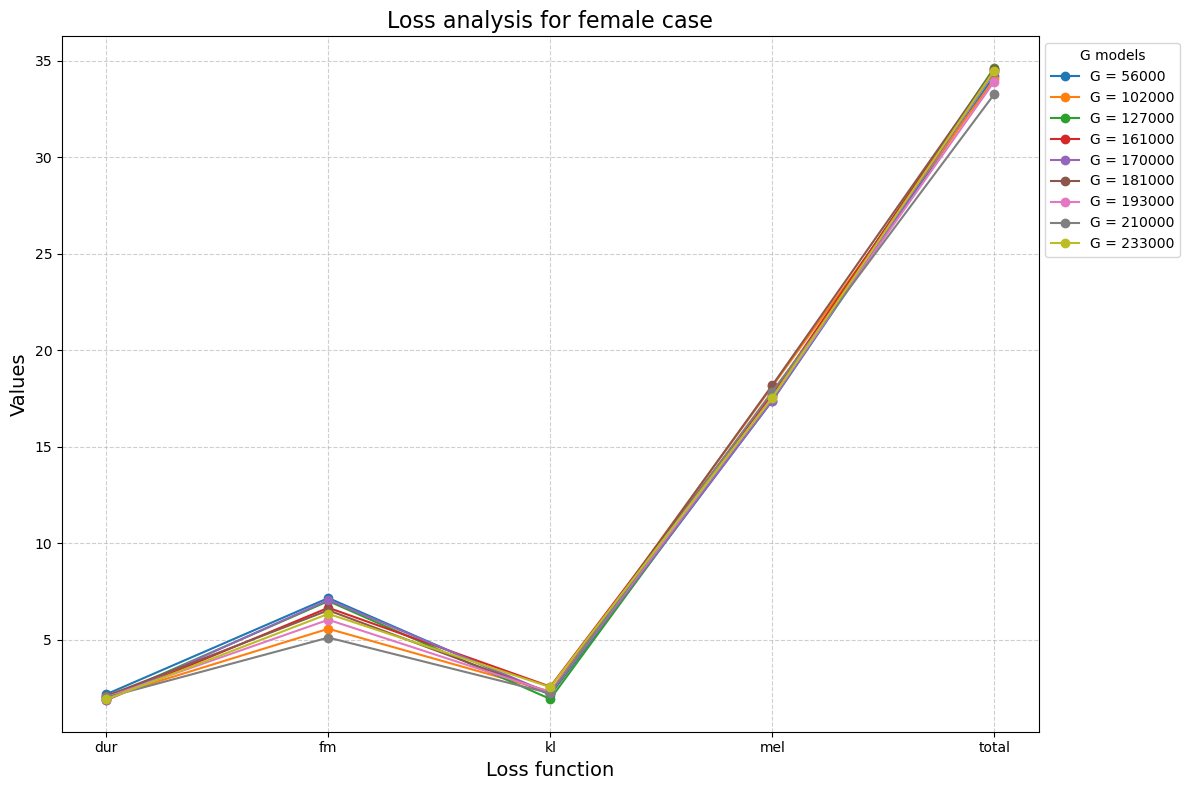

In [6]:
import matplotlib.pyplot as plt

# Crear la figura
fig, ax = plt.subplots(figsize=(12, 8))

# Lista para guardar los puntos de interés (fm y kl)
points = []  

# Recorrer las filas del DataFrame
for _, row in df_final.iterrows():
    # Guardar los puntos correspondientes a fm y kl
    for feature in ['fm', 'kl']:
        y_value = row[feature]
        points.append((feature, y_value, f"G = {int(row['G'])}, {feature} = {y_value:.2f}"))
    
    # Graficar línea completa (opcional para contexto)
    y_values = row[['dur', 'fm', 'kl', 'mel', 'total']].values
    x_labels = ['dur', 'fm', 'kl', 'mel', 'total']
    ax.plot(x_labels, y_values, marker='o', label=f"G = {int(row['G'])}")

# Personalizar la gráfica
ax.set_title("Loss analysis for female case", fontsize=16)
ax.set_xlabel("Loss function", fontsize=14)
ax.set_ylabel("Values", fontsize=14)
ax.legend(title="G models", fontsize=10, loc="upper left", bbox_to_anchor=(1, 1))
ax.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()


# Mostrar la gráfica
plt.show()




# MALE - MARK

In [10]:
import pandas as pd

# Listado de los archivos CSV
male_paths = [
    "male/loss_dur_male.csv",
    "male/loss_fm_male.csv",
    "male/loss_kl_male.csv",
    "male/loss_mel_male.csv",
    "male/loss_all_male.csv"
]

# Leer los archivos CSV y almacenar en una lista de DataFrames
dataframe2 = []
for f in male_paths:
    df2 = pd.read_csv(f, usecols=[1])  # Solo usar la segunda columna (sin incluir G)
    dataframe2.append(df2)

# Concatenar todos los DataFrames en uno solo
male = pd.concat(dataframe2, ignore_index=True, axis=1)

# Renombrar las columnas del DataFrame male correctamente
male.columns = ['dur', 'fm', 'kl', 'mel', 'total']

# Ahora 'male' no tendrá la columna 'G' por defecto
# Mostrar el DataFrame para verificar que no se ha añadido la columna 'G'
male

,dur,fm,kl,mel,total
0,6.757716,9.790964,7.631106,35.511589,68.193085
1,2.316747,10.954941,2.760939,22.185949,45.932873
2,2.354104,10.468636,2.780410,21.605055,45.469456
3,2.179461,10.929339,2.334528,20.155890,43.773056
4,2.305061,10.548841,2.146120,19.576054,43.117332
...,...,...,...,...,...
1256,2.226067,6.377756,2.198045,17.784740,36.229603
1257,2.195703,8.289199,2.556134,19.235691,39.008884
1258,2.182072,7.741603,2.090560,17.434931,37.185802
1259,2.176164,8.384360,2.048781,17.298552,37.433903


In [ ]:
# colors = ['blue', 'green', 'red', 'yellow', 'pink']

# # Graficar las distribuciones superpuestas
# plt.figure(figsize=(10, 6))
# for column, color in zip(male.columns, colors):
#     sns.kdeplot(male[column], shade=True, color=color, label=column)

# # Personalización de la gráfica
# plt.title('Distribuciones de las pérdidas', fontsize=16)
# plt.xlabel('Valor', fontsize=14)
# plt.ylabel('Densidad', fontsize=14)
# plt.legend(title='Columnas', fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.show()

In [11]:
# Crear la nueva columna G
male['G'] = male.index * 200

# Filtrar filas donde G sea múltiplo de 1000
df_filtered_male = male[male['G'] % 1000 == 0]
df_filtered_male

,dur,fm,kl,mel,total,G
0,6.757716,9.790964,7.631106,35.511589,68.193085,0
5,2.425882,10.474901,2.674608,20.784628,44.832657,1000
10,2.503510,7.984297,3.274585,20.365288,41.287601,2000
15,2.177670,8.072282,2.052276,19.530315,38.700966,3000
20,2.110834,8.251022,2.478398,19.456377,39.009052,4000
...,...,...,...,...,...,...
1240,2.099939,7.352435,2.215914,19.090794,37.721977,248000
1245,2.216151,7.062891,2.809738,17.909288,37.131977,249000
1250,2.023194,7.834504,2.284121,17.373890,36.384186,250000
1255,1.991335,7.102975,2.069158,17.382553,35.993603,251000


In [12]:
# Lista de valores específicos de G que queremos conservar
valores_g = [203000, 202000, 147000, 184000, 183000, 171000, 155000, 101000, 176000]

# Filtrar las filas que tienen valores de G en la lista
df_final_male = df_filtered_male[df_filtered_male['G'].isin(valores_g)]

# Mostrar el resultado
print(df_final_male)

           dur        fm        kl        mel      total       G
505   2.106705  6.564703  2.465718  17.765100  35.970623  101000
735   2.148595  7.080939  2.280776  17.160343  35.255680  147000
775   2.195168  7.672266  1.949248  17.425554  35.841637  155000
855   2.153513  6.478439  2.400286  17.606714  35.486092  171000
880   2.253581  6.367444  2.189458  18.203873  35.987022  176000
915   2.170399  6.688488  1.826126  17.189251  35.436115  183000
920   2.117769  7.001057  2.062817  17.015375  35.354885  184000
1010  2.187885  6.478731  1.787731  16.867285  34.999161  202000
1015  2.190622  6.670559  2.002854  17.568371  34.691307  203000


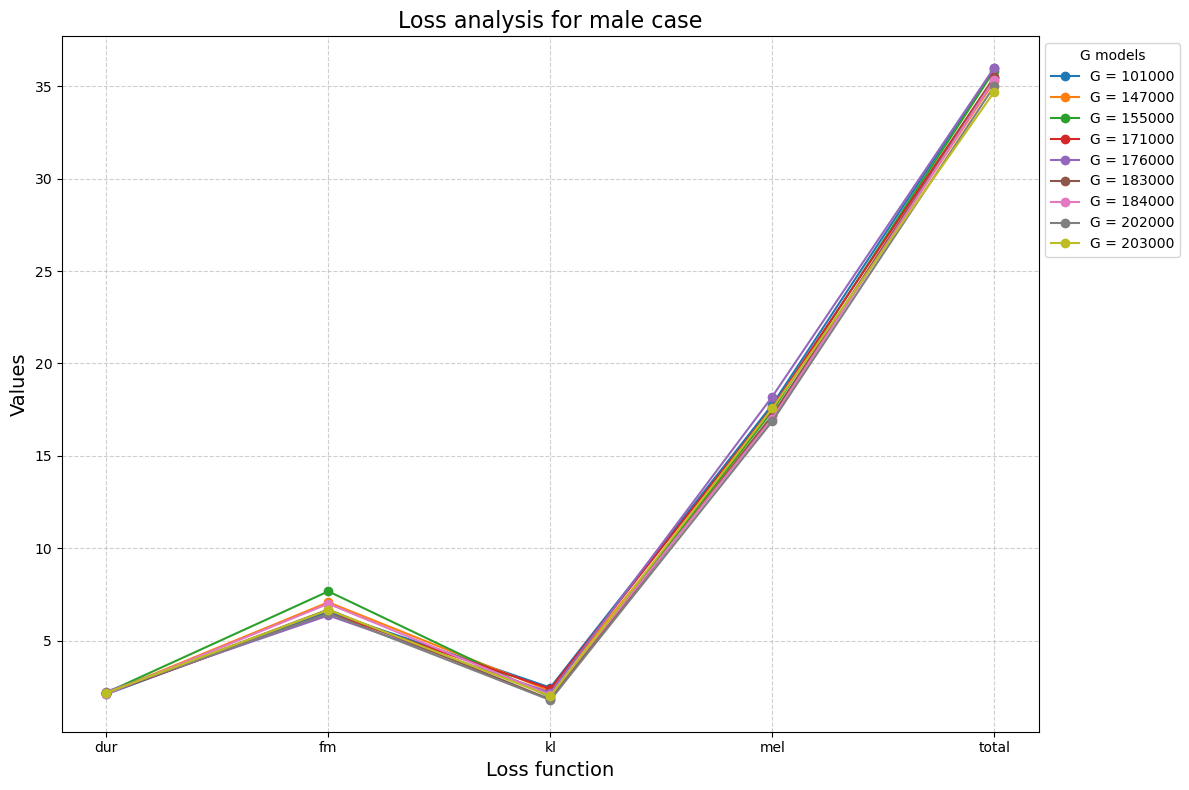

In [13]:
import matplotlib.pyplot as plt

# Crear la figura
fig, ax = plt.subplots(figsize=(12, 8))

# Lista para guardar los puntos de interés (fm y kl)
points = []  

# Recorrer las filas del DataFrame
for _, row in df_final_male.iterrows():
    # Guardar los puntos correspondientes a fm y kl
    for feature in ['fm', 'kl']:
        y_value = row[feature]
        points.append((feature, y_value, f"G = {int(row['G'])}, {feature} = {y_value:.2f}"))
    
    # Graficar línea completa (opcional para contexto)
    y_values = row[['dur', 'fm', 'kl', 'mel', 'total']].values
    x_labels = ['dur', 'fm', 'kl', 'mel', 'total']
    ax.plot(x_labels, y_values, marker='o', label=f"G = {int(row['G'])}")

# Personalizar la gráfica
ax.set_title("Loss analysis for male case", fontsize=16)
ax.set_xlabel("Loss function", fontsize=14)
ax.set_ylabel("Values", fontsize=14)
ax.legend(title="G models", fontsize=10, loc="upper left", bbox_to_anchor=(1, 1))
ax.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()


# Mostrar la gráfica
plt.show()


In [ ]:
# import matplotlib.pyplot as plt

# # Crear la figura y los subplots
# fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharey=True)

# # Nombres de las columnas de pérdidas
# loss_columns = ['dur', 'fm', 'kl', 'mel', 'total']

# # Iterar sobre cada pérdida y cada subplot
# for i, loss in enumerate(loss_columns):
#     ax = axes[i // 2, i % 2]  # Obtener el subplot correspondiente
    
#     # Graficar los valores de df_final
#     ax.plot(df_final['G'], df_final[loss], marker='o', label='df_final', color='blue')
    
#     # Graficar los valores de df_final_male
#     ax.plot(df_final_male['G'], df_final_male[loss], marker='o', label='df_final_male', color='orange')
    
#     # Personalizar el subplot
#     ax.set_title(loss, fontsize=14)
#     ax.set_xlabel('G', fontsize=12)
#     if i % 2 == 0:  # Solo el primer subplot de cada columna tiene etiqueta en el eje Y
#         ax.set_ylabel('Valor', fontsize=12)
#     ax.grid(True, linestyle="--", alpha=0.6)

# # Añadir la leyenda fuera de los subplots
# fig.legend(['df_final', 'df_final_male'], loc='upper center', fontsize=12, ncol=2)

# # Ajustar el diseño
# plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.suptitle('Comparación de pérdidas entre df_final y df_final_male', fontsize=16)

# # Mostrar la gráfica
# plt.show()

